In [1]:
import rasterio
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
import os
os.getcwd()

%mkdir filezones_Col shapefiles_Col

In [2]:
# Importing holdridge values -- Colombia 2011
hold = pd.read_csv('data/holdrigde_Colombia(2011).csv', na_values = '')

# precipitation dataframe to compare
precipitation = hold[['pta1_mm', 'pta2_mm', 'precipitation']].copy().sort_values(by='pta1_mm').drop_duplicates(subset='precipitation').sort_values(by='pta2_mm').reset_index(drop=True).values.tolist()

# temperature dataframe to compare
temperature = hold[['amt1_c', 'amt2_c', 'temperature']].copy().sort_values(by='amt2_c').drop_duplicates(subset='temperature').sort_values(by='amt1_c').reset_index(drop=True).values.tolist()

# elevation dataframe toc compare
elevation = hold[['elev1_m', 'elev2_m', 'elevation']].copy().sort_values(by='elevation').drop_duplicates(subset='elevation').sort_values(by='elev1_m').reset_index(drop=True).values.tolist()


In [3]:
# Function for classification
def classification(array, lista):
  array = array.astype('float64')
  for i in lista:
    limit1, limit2, code = i
    array[np.where(array == -999)] = np.nan
    array[np.where(array < 0)] = 0
    array[np.where((array >= limit1) & (array < limit2))] = code
  return array

# **1. Colombia**

## **1.1. Rasters management**

### **a) Precipitation**

In [4]:
# Precipitation clipped raster and reclassification
with rasterio.open('data/Colombia-BioClim30s_Precipitation.tif') as src:    
    # Read as numpy array
    array = src.read()
    profile = src.profile
    
    # Reclassify
    array1 = classification(array, precipitation)
    
    # update profile
    profile.update(
        dtype=rasterio.float64,
        nodata=np.nan)

-------- Reclassification ------------------
array[np.where((array >= 0) & (array < 1000))] = 10000
array[np.where((array >= 1000) & (array < 2000))] = 20000
array[np.where((array >= 2000) & (array < 4000))] = 30000
array[np.where((array >= 4000) & (array < 8000))] = 40000
array[np.where((array >= 8000) & (array < 10000))] = 50000

-------- Raster information -------------------
[10000. 20000. 30000. 40000. 50000.    nan]
50000.0
10000.0
float32

------------------- Map ----------------------


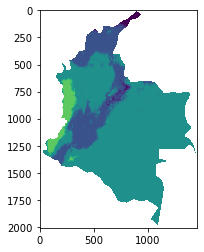

<AxesSubplot:>

In [5]:
# values replaced
print('-------- Reclassification ------------------')
for i in precipitation:
    limit1, limit2, code = i
    print(f'array[np.where((array >= {limit1}) & (array < {limit2}))] = {code}')

# values from raster
print('\n-------- Raster information -------------------')
print(np.unique(array1))
print(np.nanmax(array1))
print(np.nanmin(array1))
print(array.dtype)

# values from raster
print('\n------------------- Map ----------------------')
show(array1)

### **b) Temperature**

In [6]:
# Temperature clipped raster and reclassification
with rasterio.open('data/Colombia-BioClim30s_Temperature.tif') as src:    
    # Read as numpy array
    array2 = src.read()
    profile = src.profile

    #  Reclassify
    array2= classification(array2, temperature)

    # update profile
    profile.update(
        dtype=rasterio.float64,
        nodata=np.nan)

-------- Reclassification ------------------
array[np.where((array >= 0) & (array < 12))] = 50
array[np.where((array >= 12) & (array < 18))] = 51
array[np.where((array >= 18) & (array < 24))] = 52
array[np.where((array >= 24) & (array < 40))] = 53

-------- Raster information -------------------
[50. 51. 52. 53. nan]
53.0
50.0
float32

------------------- Map ----------------------


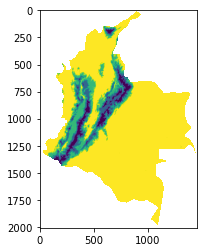

<AxesSubplot:>

In [7]:
# values replaced
print('-------- Reclassification ------------------')
for i in temperature:
    limit1, limit2, code = i
    print(f'array[np.where((array >= {limit1}) & (array < {limit2}))] = {code}')

# values from raster
print('\n-------- Raster information -------------------')
print(np.unique(array2))
print(np.nanmax(array2))
print(np.nanmin(array2))
print(array.dtype)

# values from raster
print('\n------------------- Map ----------------------')
show(array2)

### **c) Elevation**

In [8]:
# elevation clipped raster and reclassification
with rasterio.open('data/Colombia_BioClim30s_Elevation.tif') as src:    
    # Read as numpy array
    array = src.read()
    profile = src.profile

    # Reclassify
    array3= classification(array, elevation)
    
    # update profile
    profile.update(
        dtype=rasterio.float64,
        nodata=np.nan)

-------- Reclassification ------------------
array[np.where((array >= 0) & (array < 800))] = 11
array[np.where((array >= 800) & (array < 1800))] = 22
array[np.where((array >= 1800) & (array < 2800))] = 33
array[np.where((array >= 2800) & (array < 6000))] = 44

-------- Raster information -------------------
[11. 22. 33. 44. nan]
44.0
11.0
int16

------------------- Map ----------------------


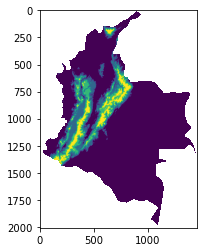

<AxesSubplot:>

In [9]:
# values replaced
print('-------- Reclassification ------------------')
for i in elevation:
    limit1, limit2, code = i
    print(f'array[np.where((array >= {limit1}) & (array < {limit2}))] = {code}')

# values from raster
print('\n-------- Raster information -------------------')
print(np.unique(array3))
print(np.nanmax(array3))
print(np.nanmin(array3))
print(array.dtype)

# values from raster
print('\n------------------- Map ----------------------')
show(array3)

## **2.1. Lifezone-1 (Altitude  + Temperature + Precipitation)**


-------- Raster information -------------------
[10063. 10064. 10074. 10083. 10084. 10094. 10095. 20063. 20064. 20073.
 20074. 20075. 20083. 20084. 20085. 20094. 20095. 30063. 30064. 30073.
 30074. 30075. 30083. 30084. 30085. 30094. 30095. 40063. 40064. 40074.
 50064.    nan]
50064.0
10063.0
int16

------------------- Map ----------------------


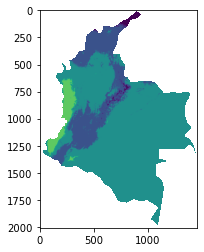

<AxesSubplot:>

In [10]:
# Algebra management of rasters
life = array1 + array2 + array3

# values from raster
print('\n-------- Raster information -------------------')
print(np.unique(life))
print(np.nanmax(life))
print(np.nanmin(life))
print(array.dtype)

# values from raster
print('\n------------------- Map ----------------------')
show(life)

In [11]:
# Dataframe for checking out the values
hold['code'] = hold['temperature'] + hold['precipitation'] + hold['elevation']
lifezone_df = pd.DataFrame(list(set(life[~np.isnan(life)])), columns=['value'])
compare = dict(zip(hold['code'], hold['id']))

# after compare the data from dataframe and the values generated in the tif
lifezone_df['id'] = lifezone_df.value.map(compare)
lifezone_df # inconsistent results

,value,id
0,40064.0,bmh-T
1,30083.0,NaN
2,30084.0,bmh-MB
3,30085.0,NaN
4,40074.0,bp-PM
5,30094.0,bp-M
6,30095.0,NaN
7,50064.0,bp-T
8,10063.0,NaN
9,10064.0,bms-T


In [12]:
with rasterio.open('filezones_Col/Colombia30s-v1.tif', 'w', **profile) as dst:
    # Write to disk
    dst.write(life)

## **2.2. Lifezone-2 (Temperature + Precipitation)**


-------- Raster information -------------------
[10050. 10051. 10052. 10053. 20050. 20051. 20052. 20053. 30050. 30051.
 30052. 30053. 40052. 40053. 50053.    nan]
50053.0
10050.0
int16

------------------- Map ----------------------


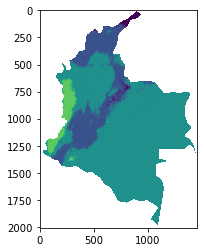

<AxesSubplot:>

In [13]:
# Algebra management of rasters
life2 = array1 + array2

# values from raster
print('\n-------- Raster information -------------------')
print(np.unique(life2))
print(np.nanmax(life2))
print(np.nanmin(life2))
print(array.dtype)

# values from raster
print('\n------------------- Map ----------------------')
show(life2)

In [14]:
# Dataframe for checking out the values
hold['code'] = hold['temperature'] + hold['precipitation']
lifezone2_df = pd.DataFrame(list(set(life2[~np.isnan(life2)])), columns=['value'])
compare = dict(zip(hold['code'], hold['id']))

# after compare the data from dataframe and the values generated in the tif
lifezone2_df['id'] = lifezone2_df.value.map(compare)
lifezone2_df

,value,id
0,30050.0,bp-M
1,30051.0,bmh-MB
2,10052.0,bs-PM
3,10053.0,bms-T
4,30052.0,bmh-PM
5,30053.0,bh-T
6,10050.0,bh-M
7,10051.0,bs-MB
8,50053.0,bp-T
9,20050.0,bmh-M


In [15]:
with rasterio.open('filezones_Col/Colombia30s-v2.tif', 'w', **profile) as dst:
    # Write to disk
    dst.write(life2)

## **3. Raster to Polygon (with GDAL)**

In [16]:
# GDAL should be installed in the remote/virtual machine
os.system('python /home/davo/miniconda3/envs/python-gis/bin/gdal_polygonize.py /home/davo/moja-data/filezones_Col/Colombia30s-v1.tif /home/davo/moja-data/shapefiles_Col/Colombia30s-v1.shp')
os.system('python /home/davo/miniconda3/envs/python-gis/bin/gdal_polygonize.py /home/davo/moja-data/filezones_Col/Colombia30s-v2.tif /home/davo/moja-data//shapefiles_Col/Colombia30s-v2.shp')


Creating output /home/davo/moja-data/shapefiles_Col/Colombia30s-v1.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output /home/davo/moja-data//shapefiles_Col/Colombia30s-v2.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


0

## **4. Reshape Polygons with classifications (with geopandas)**

### Lifezone1

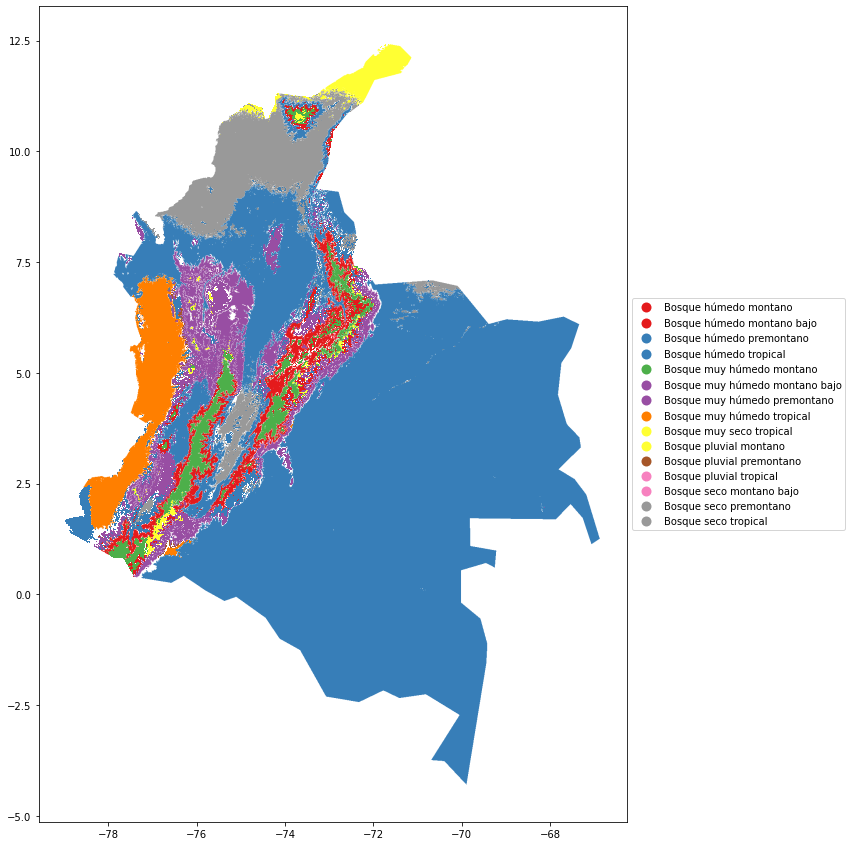

In [17]:
# importing the data
colombia1 = gpd.read_file("/home/davo/moja-data/shapefiles_Col/Colombia30s-v1.shp")
colombia1.rename(columns={'DN':'value'}, inplace=True)

# Arragnement for replacing
hold['code'] = hold['temperature'] + hold['precipitation'] + hold['elevation']
short_name = dict(zip(hold['code'], hold['id']))
long_name= dict(zip(hold['code'], hold['bosque']))

# replacing
colombia1['short_name'] = colombia1.value.map(short_name)
colombia1['long_name'] = colombia1.value.map(long_name)

# rearragement
colombia1 = colombia1[['value', 'short_name', 'long_name', 'geometry']].copy()
colombia1.plot(figsize=(15,15), cmap='Set1', column= 'long_name', legend=True,
legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.plot()

# rewriting updated version
colombia1.to_file("/home/davo/moja-data/shapefiles_Col/Colombia30s-v1.shp")

### Lifezone2

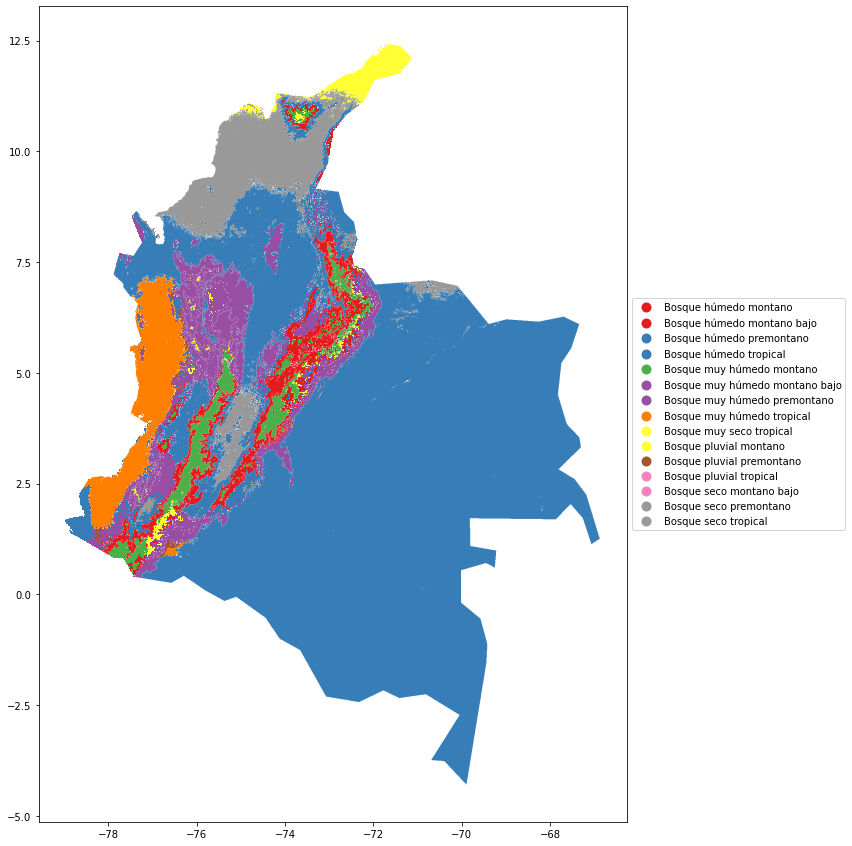

In [18]:
# importing the data
colombia2 = gpd.read_file("/home/davo/moja-data/shapefiles_Col/Colombia30s-v2.shp")
colombia2.rename(columns={'DN':'value'}, inplace=True)

# Arragnement for replacing
hold['code'] = hold['temperature'] + hold['precipitation']
short_name = dict(zip(hold['code'], hold['id']))
long_name= dict(zip(hold['code'], hold['bosque']))

# replacing
colombia2['short_name'] = colombia2.value.map(short_name)
colombia2['long_name'] = colombia2.value.map(long_name)

# rearragement
colombia2 = colombia2[['value', 'short_name', 'long_name', 'geometry']].copy()
colombia2.plot(figsize=(15,15), cmap='Set1', column= 'long_name', legend=True,
legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.plot()

# rewriting updated version
colombia2.to_file("/home/davo/moja-data/shapefiles_Col/Colombia30s-v2.shp")